# エラーの種類

Pythonで発生するエラーには、「構文エラー」と「例外」の2種類があります。

## 構文エラー

Pythonのルールに従わない記述がなされたときに発生するエラーです。


* タイプミスなどによるSyntax Error
* 不適切なインデントで生じるIndentation Error



### Syntax Errorの例
文字列が閉じられていないことで発生するSyntaxError

In [ ]:
print("私情協)

SyntaxError: ignored

### Indentation Errorの例
forの後にインデントブロック（繰り返す処理を記述する部分）がインデントされていないことで発生するIndentation Error

In [ ]:
for i in range(5):
print(i)

IndentationError: ignored

## 例外

Pythonのプログラム実行時に発生**した**予期されていないエラーです。

*   プログラムの構文には問題ありません
*   必ず例外が発生するとは限りません
*   別の例外が発生することもあります



### 例外の例

存在しないモジュールJUCEをインポートしようとしたことで発生した例外ModuleNotFoundError

In [ ]:
import JUCE

ModuleNotFoundError: ignored

# エラーメッセージの読み方

## エラーの発生場所を確認する

エラーメッセージを読んで、どこでどんな問題が起きているのかを知りましょう。

なお、エラーが発生した場所とエラーの原因になっている場所・部分は**同じとは限らない**ことに注意しましょう。

In [ ]:
print("私情協)

SyntaxError: ignored

エラーメッセージ先頭の

`  File "<ipython-input-9-de8c4d5c4177>", line 1`

は、ファイル<ipython-input-9-de8c4d5c4177>のline 1（1行目）で構文エラーが発生したことを示しています。

```
    print("私情協)
          ^
```
は、構文エラーが発生した実際のコードと場所を記しています。

最後の

`SyntaxError: unterminated string literal (detected at line 1)`

は、どんなエラーが出ているのかが記されています。この例では、unterminated string literalというエラーが1行目で発生していることが分かります。



## エラーの解決

終端のない文字列リテラル、つまり文字列「私情協」が閉じられていないので、次のように私情協の最後に「**"**」を追加すればエラーは解決します。

```print("私情協")```

このように、エラーメッセージはエラーの解決方法を示しているのではありません。
エラーメッセージからどこでどんな問題が発生しているかを把握した上で、その問題はなぜ起きているのかどのようにその問題を解決するかを考えることが重要です。

## 例外でのエラーメッセージ

例外の場合は、エラーの種類と`Traceback (most recent call last)`に続いて沢山のメッセージが表示されます。


KeyError: ignored

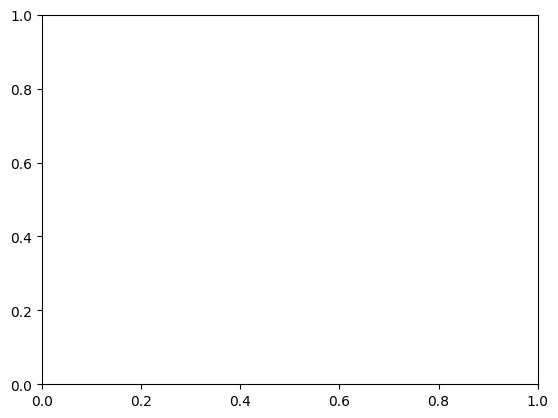

In [ ]:
import pandas as pd

df = pd.read_csv('sample_data/california_housing_test.csv')
df.plot.scatter(x='population', y='median_house_values')

### Traceback
トレースバック（Traceback）とは、このプログラム内で呼び出された関数の履歴のことです。

この例では、
```
KeyError                                  Traceback (most recent call last)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   3801             try:
-> 3802                 return self._engine.get_loc(casted_key)
   3803             except KeyError as err:
```
が最初にに表示されています。
`
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
`
から、base.pyのget_loc()という関数でKeyErrorという例外が発生している事が分かります。
しかし、このbase.pyというファイルやget_loc()という関数は書いていません。

書いてもいないプログラムがなぜ実行されたのでしょう。
それは、例として書いたプログラムのどこかで、このget_loc()という関数を呼び出しているからです。




### 原因究明

このget_loc()関数を呼び出すことになった根本のコードを見つけるために、
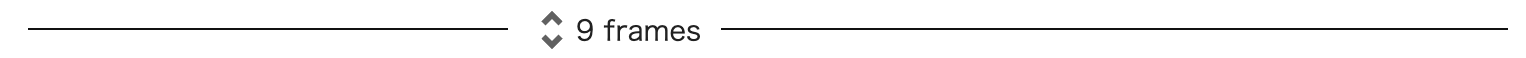

と表示されている部分をクリックして、トレースバックを展開しましょう。

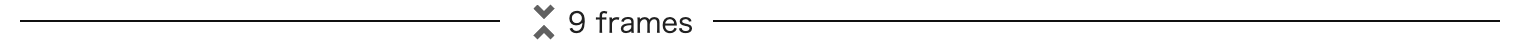

すると、

```
KeyError                                  Traceback (most recent call last)
<ipython-input-6-f1b623d731a5> in <cell line: 4>()
      2
      3 df = pd.read_csv('sample_data/california_housing_test.csv')
----> 4 df.plot.scatter(x='population', y='median_house_values')
```
のように、実際に書いたプログラムが表示されました。
これをみると、4行目に問題があるようです。

さらに、その少し上には
`
KeyError: 'median_house_values'
`
とKeyErrorの詳細も書かれています。

これらから、4行目の中でも
`
y='median_house_values'
`
の部分に問題があることが分かります。



In [ ]:
df



longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value  
0         1537.0       606.0         6.6085            344700.0  
1          809.0       277.0         3.5990            176500.0  
2         1484.0       495.0         5.7934            270500.0  
3           49.0        11.0         6.1359            330000.0  
4          850.0       237.0         2.9375             81700.0  
...          ...         ...            ...                 ...  
2995      1258.0       607.0         1.1790            225000.0  
2996      3496.0      1036.0         3.3906            237200.0  
2997       693.0       220.0         2.2895             62000.0  
2998        46.0        14.0         3.2708            162500.0  
2999       753.0       260.0         8.5608            500001.0  

[3000 rows x 9 columns]

### エラーの解決
実際に
```
df
```
を実行して列名を確認すると、`median_house_values`ではなく`median_house_value`でした。

４行目の
```
y='median_house_values'
```
を
```
y='median_house_value'
```
と修正して実行してみましょう。

<Axes: xlabel='population', ylabel='median_house_value'>

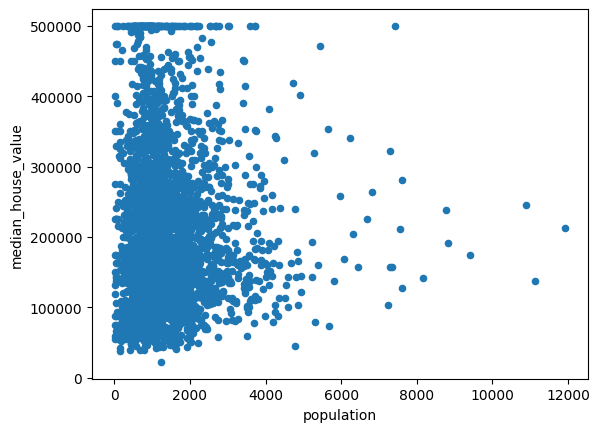

In [ ]:
df.plot.scatter(x='population', y='median_house_value')

# その他のよくあるエラーとその対処

##  NameError

関数名や変数名に間違いがあります。変数名や関数名が正しく入力できているか確認しましょう。

In [ ]:
printf("私情協")


NameError: ignored

NameErrorとして
```
name 'printf' is not defined (「printf」という名前が定義されていない)
```
と指摘されています。
printとタイプするつもりが、間違えてprintfとタイプしてしまったようです。
printに修正して動作を確認しましょう。
注：もし、printfという関数を定義しているにもかかわらずこの指摘が表示されたら、関数printfの定義が適切に行われているかを確認しましょう。

In [ ]:
print("私情協")

私情協


## TypeError
異なる型の値で演算をしようとしたり、関数の引数の型が不適切だった場合に発生します。型を揃えて演算をしたり、使用する関数の引数の数や順番などを確認しましょう。


In [ ]:
print("1+1=" + (1+1))

TypeError: ignored

```
can only concatenate str (not "int") to str (int型ではなくstr型だけがstr型に連結できる)
```
と指摘されています。
```
"1+1"
```
はstr型（文字列）ですが
```
(1+1)
```
はint型（整数）であり、演算子の左辺と右辺の型が異なっているため、+演算子を用いて連結することができません。

str関数を使ってint型をstr型に変換し、結合させましょう。

In [ ]:
print("1+1=" + str(1+1))

1+1=2


## IndexError
インデックスの範囲を超えた指定がなされています。値が範囲内にあるかを確認しましょう。

In [ ]:
forum = ["情報ネット社会の期待と課題", "未来を創るソーシャルネット力", "新たな価値を創出するビッグデータの活用"]
print(forum[3])

IndexError: ignored

リストforumは、３つの要素を持っています。このリストのインデックスは0から始まるので、forum[0], forum[1], forum[2]は存在しますが、forum[3]は存在しません。
そのため、
```
list index out of range (リストのインデックスが範囲外)
```
という指摘がなされています。
print関数で3つ目の要素を表示させたかったのか、リストforumは4つ以上の要素を持つはずだったのか、確認しましょう。

# まとめ

エラーメッセージの読み方について説明しました。
- Pythonで発生するエラーには「構文エラー」と「例外」がある
- エラーメッセージには、エラーが発生した場所やどんなエラーが発生したかなどの情報が含まれている
  - ただし、エラーが発生した場所と、その原因（修正すべき場所）は同じとは限らない
  - トレースバックは展開して表示させる必要がある場合もある
- 例外が発生すると沢山のメッセージが表示されるが、トレースバックを順を追っていけば原因を見つけられる
- エラーメッセージを理解して、どのようにしたらそのエラーを解決出来るかを考えましょう！
